In [203]:
#Importamos librerías
import numpy as np # data arrays
import pandas as pd # data structure and data analysis
import matplotlib.pyplot as plt # data visualization
import datetime as dt # date time
import seaborn as sns # data visualization
from sklearn.linear_model import LinearRegression # regression
from sklearn.model_selection import train_test_split # test and training

In [164]:
#Abrimos archivo 
df_airbnb = pd.read_csv("airbnb-listings.csv", sep=";")

In [165]:
#Contamos cuántas columnas y filas tiene el dataset
print('Columnas : ', len(df_airbnb.columns))
print('Filas    : ', len(df_airbnb.index))

Columnas :  89
Filas    :  14780


In [166]:
#Imprimimos todas las columnas en formato lista
print(df_airbnb.columns.tolist())

['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count', 'Host Verifications', 'Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Max

In [176]:
#Sumamos los valores nulos que tienen cada una de las columnas
missing_values_count = df_airbnb.isnull().sum()
missing_values_count

ID                                   0
Listing Url                          0
Scrape ID                            0
Last Scraped                         0
Name                                 0
                                  ... 
Cancellation Policy                  0
Calculated host listings count       0
Reviews per Month                 2713
Geolocation                          0
Features                             0
Length: 89, dtype: int64

In [177]:
#Ordenamos de mayor a menor las columnas con más valores nulos
missing_values_count.sort_values(ascending=False)

Has Availability        13207
Host Acceptance Rate    13207
Jurisdiction Names      13207
License                 12959
Square Feet             12688
                        ...  
Accommodates                0
Bed Type                    0
Guests Included             0
Extra People                0
Features                    0
Length: 89, dtype: int64

In [178]:
#Devuelve True si la suma de valores nulos es mayor a 1000
missing_values_count>1000

ID                                False
Listing Url                       False
Scrape ID                         False
Last Scraped                      False
Name                              False
                                  ...  
Cancellation Policy               False
Calculated host listings count    False
Reviews per Month                  True
Geolocation                       False
Features                          False
Length: 89, dtype: bool

In [179]:
#Obtenemos las columnas cuya suma de valores nulos es mayor a 1000
nulldata = df_airbnb.isnull().sum()
print(nulldata[nulldata > 1000].sort_values(ascending=False))

Jurisdiction Names             13207
Host Acceptance Rate           13207
Has Availability               13207
License                        12959
Square Feet                    12688
Monthly Price                   9893
Weekly Price                    9858
Notes                           8201
Security Deposit                7572
Interaction                     5722
Access                          5705
Cleaning Fee                    5387
Transit                         4987
Host About                      4972
Neighborhood Overview           4938
House Rules                     4648
Neighbourhood                   4454
Space                           3562
Host Neighbourhood              3249
Review Scores Location          2868
Review Scores Value             2868
Review Scores Checkin           2866
Review Scores Accuracy          2856
Review Scores Cleanliness       2850
Review Scores Communication     2850
Review Scores Rating            2838
Last Review                     2714
F

In [180]:
#A pesar de que el dataset es de Madrid podemos observar como hay otros paises y ciudades 
print(pd.unique(df_airbnb["Country"]))

print(pd.unique(df_airbnb["City"]))

['Spain']
['Madrid']


In [172]:
#Filtramos el dataset para quedarnos solamente con aquellas filas donde City sea Madrid y Country Spain
df_airbnb = df_airbnb[(df_airbnb['City'] == "Madrid") & (df_airbnb['Country'] == 'Spain')]

print(pd.unique(df_airbnb["Country"]))
print(pd.unique(df_airbnb["City"]))


['Spain']
['Madrid']


In [181]:
#Creamos un nuevo df donde seleccionamos las columnas cuyos valores sean compatibles con lo que queremos estudiar
#Quitamos Zipcode por falta de datos y coherencia (datos incompletos, números que no se corresponden con Madrid)
#Quitamos State porque no nos aporta más información de la que nos da la variable City
#Quitamos Country Code y Smart Location porque no nos aportan más información que la del país (ES) o la ciudad (que ya está en City)
df = df_airbnb[['ID','Host ID', 'Host Since', 'Host Name', 'Street', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 
                'Country', 'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type',
                'Price','Number of Reviews', 'Cancellation Policy', 'Geolocation']]


In [182]:
#Contamos nuevamente cuántas columnas y filas tiene el nuevo df
print('Columnas : ', len(df.columns))
print('Filas    : ', len(df.index))

Columnas :  21
Filas    :  13207


## PARAMOS AQUI PARA EL DATAWAREHOUSE

Revisión de columnas

In [185]:
#Número de nulos en las columnas seleccionadas
missing_values_count_2 = df.isnull().sum().sort_values(ascending=False)
missing_values_count_2

#Otra forma con el mismo resultado: df.isna().sum().sort_values(ascending=False) 

Beds                            49
Bathrooms                       49
Bedrooms                        23
Price                            9
Host Since                       3
Host Name                        3
ID                               0
Room Type                        0
Cancellation Policy              0
Number of Reviews                0
Bed Type                         0
Longitude                        0
Property Type                    0
Host ID                          0
Latitude                         0
Country                          0
City                             0
Neighbourhood Group Cleansed     0
Neighbourhood Cleansed           0
Street                           0
Geolocation                      0
dtype: int64

In [186]:
#Transformamos los valores null de la columna 'Price' con el valor promedio de dicha columna
for i in df['Price']:
	df['Price'] = df['Price'].fillna(df['Price'].mean())


C:\Users\agela\AppData\Local\Temp\ipykernel_15176\115567948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].fillna(df['Price'].mean())


In [187]:
df.isnull().sum().sort_values(ascending=False)

Beds                            49
Bathrooms                       49
Bedrooms                        23
Host Since                       3
Host Name                        3
ID                               0
Room Type                        0
Cancellation Policy              0
Number of Reviews                0
Price                            0
Bed Type                         0
Longitude                        0
Property Type                    0
Host ID                          0
Latitude                         0
Country                          0
City                             0
Neighbourhood Group Cleansed     0
Neighbourhood Cleansed           0
Street                           0
Geolocation                      0
dtype: int64

In [188]:
#Creamos nuevo dataframe con los valores NaN eliminados
df = df.dropna()


In [189]:
#Calculamos columnas y filas
print('Columnas : ', len(df.columns))
print('Filas    : ', len(df.index))

Columnas :  21
Filas    :  13120


In [191]:
#Verificamos que la suma de nulls en todas las columnas sea 0
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values

ID                              0
Property Type                   0
Cancellation Policy             0
Number of Reviews               0
Price                           0
Bed Type                        0
Beds                            0
Bedrooms                        0
Bathrooms                       0
Room Type                       0
Longitude                       0
Host ID                         0
Latitude                        0
Country                         0
City                            0
Neighbourhood Group Cleansed    0
Neighbourhood Cleansed          0
Street                          0
Host Name                       0
Host Since                      0
Geolocation                     0
dtype: int64

In [192]:
df["Host Since"]

3        2014-02-03
4        2011-07-12
5        2013-06-19
6        2012-01-24
7        2013-10-31
            ...    
14755    2015-06-24
14756    2016-03-01
14757    2012-09-11
14758    2012-09-14
14759    2013-01-03
Name: Host Since, Length: 13120, dtype: object

In [193]:
#Convertimos Host Since a dtype datatime64  
df["Host Since"] = pd.to_datetime(df["Host Since"], format="%Y/%m/%d")

# print the first 5 rows of "ActivityDate" to confirm
#airbnb["Host Since"].head()

C:\Users\agela\AppData\Local\Temp\ipykernel_15176\832039769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Host Since"] = pd.to_datetime(df["Host Since"], format="%Y/%m/%d")


In [194]:
#Los vecindarios son una de las variables clave en nuestro proyecto
#Vemos los vecindarios que hay en nuestro dataset
df['Neighbourhood Cleansed'].unique()

array(['Palacio', 'Embajadores', 'Cortes', 'Justicia', 'Universidad',
       'Sol', 'Imperial', 'Acacias', 'Ventas', 'Pueblo Nuevo', 'Quintana',
       'Concepción', 'Canillas', 'Pinar del Rey', 'San Andrés',
       'Arapiles', 'Trafalgar', 'Almagro', 'Chopera', 'Legazpi',
       'Delicias', 'Palos de Moguer', 'Prosperidad', 'Hispanoamérica',
       'Nueva España', 'Castilla', 'Bellas Vistas', 'Cuatro Caminos',
       'Vallehermoso', 'Almenara', 'Valdeacederas', 'Berruguete',
       'Gaztambide', 'Guindalera', 'Lista', 'Castellana', 'El Viso',
       'Recoletos', 'Goya', 'Fuente del Berro', 'Atocha', 'Pacífico',
       'Adelfas', 'Estrella', 'Ibiza', 'Jerónimos', 'Rios Rosas',
       'Peñagrande', 'Argüelles', 'Puerta del Angel', 'Lucero', 'Aluche',
       'Campamento', 'Aguilas', 'Comillas', 'Vista Alegre', 'La Paz',
       'Valverde', 'Casa de Campo', 'Numancia', 'Puerta Bonita',
       'Buenavista', 'Abrantes', 'Moscardó', 'Entrevías', 'San Diego',
       'Palomeras Sureste', 'Fonta

In [195]:
#En total son 125 vecindarios
len(df['Neighbourhood Cleansed'].unique())

125

In [196]:
#El nombre de los vecindarios los cambiamos a mayúsculas
df['Neighbourhood Cleansed'] = df['Neighbourhood Cleansed'].str.upper()

df.head()

C:\Users\agela\AppData\Local\Temp\ipykernel_15176\3117930092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Neighbourhood Cleansed'] = df['Neighbourhood Cleansed'].str.upper()


,ID,Host ID,Host Since,Host Name,Street,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,Country,Latitude,...,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Price,Number of Reviews,Cancellation Policy,Geolocation
3,3150371,11902716,2014-02-03,Daniel Y Ximena,"Palacio, Madrid, Community of Madrid 28005, Spain",PALACIO,Centro,Madrid,Spain,40.410106,...,Apartment,Private room,1.0,1.0,1.0,Real Bed,36.0,80,flexible,"40.41010608050749, -3.714754034177323"
4,3378181,809083,2011-07-12,Michael,"Palacio, Madrid, Community of Madrid 28013, Spain",PALACIO,Centro,Madrid,Spain,40.416969,...,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,85.0,90,strict,"40.416968822636726, -3.7094389211089993"
5,2070750,7005367,2013-06-19,Sergio,"Madrid, Community of Madrid, Spain",PALACIO,Centro,Madrid,Spain,40.409705,...,Apartment,Private room,1.0,1.0,1.0,Real Bed,20.0,20,flexible,"40.40970517560235, -3.7135611928841086"
6,9832499,1647109,2012-01-24,Daniel,"Malasaña, Madrid, Comunidad de Madrid, Spain",PALACIO,Centro,Madrid,Spain,40.423193,...,Apartment,Entire home/apt,1.0,1.0,2.0,Real Bed,112.0,55,strict,"40.42319271738103, -3.7112486513892"
7,1868170,9738650,2013-10-31,Carlos Chamarro,"Palacio, Madrid, Community of Madrid 28005, Spain",PALACIO,Centro,Madrid,Spain,40.416514,...,Apartment,Entire home/apt,3.0,3.0,4.0,Real Bed,190.0,46,moderate,"40.416513932601625, -3.7178427529546973"


In [197]:
# Quitamos los acentos de los nombres de los vecindarios

df['Neighbourhood Cleansed'] = df['Neighbourhood Cleansed'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df['Neighbourhood Cleansed'].unique()

C:\Users\agela\AppData\Local\Temp\ipykernel_15176\1070464978.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Neighbourhood Cleansed'] = df['Neighbourhood Cleansed'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')


array(['PALACIO', 'EMBAJADORES', 'CORTES', 'JUSTICIA', 'UNIVERSIDAD',
       'SOL', 'IMPERIAL', 'ACACIAS', 'VENTAS', 'PUEBLO NUEVO', 'QUINTANA',
       'CONCEPCION', 'CANILLAS', 'PINAR DEL REY', 'SAN ANDRES',
       'ARAPILES', 'TRAFALGAR', 'ALMAGRO', 'CHOPERA', 'LEGAZPI',
       'DELICIAS', 'PALOS DE MOGUER', 'PROSPERIDAD', 'HISPANOAMERICA',
       'NUEVA ESPANA', 'CASTILLA', 'BELLAS VISTAS', 'CUATRO CAMINOS',
       'VALLEHERMOSO', 'ALMENARA', 'VALDEACEDERAS', 'BERRUGUETE',
       'GAZTAMBIDE', 'GUINDALERA', 'LISTA', 'CASTELLANA', 'EL VISO',
       'RECOLETOS', 'GOYA', 'FUENTE DEL BERRO', 'ATOCHA', 'PACIFICO',
       'ADELFAS', 'ESTRELLA', 'IBIZA', 'JERONIMOS', 'RIOS ROSAS',
       'PENAGRANDE', 'ARGUELLES', 'PUERTA DEL ANGEL', 'LUCERO', 'ALUCHE',
       'CAMPAMENTO', 'AGUILAS', 'COMILLAS', 'VISTA ALEGRE', 'LA PAZ',
       'VALVERDE', 'CASA DE CAMPO', 'NUMANCIA', 'PUERTA BONITA',
       'BUENAVISTA', 'ABRANTES', 'MOSCARDO', 'ENTREVIAS', 'SAN DIEGO',
       'PALOMERAS SURESTE', 'FONTA

In [200]:
#Contamos el número de alojamientos por vecindario
df['Neighbourhood Cleansed'].value_counts()

EMBAJADORES       1835
UNIVERSIDAD       1349
PALACIO           1076
SOL                940
JUSTICIA           777
                  ... 
EL PLANTIO           3
EL GOLOSO            3
CUATRO VIENTOS       3
FUENTELAREINA        3
ORCASITAS            2
Name: Neighbourhood Cleansed, Length: 125, dtype: int64

In [199]:
# Nos faltaría quitar los espacios
df.columns = df.columns.str.replace('  ', ' ')

# SECCIÓN ZIPCODE (LA MANTENEMOS POR SI ACASO)

In [ ]:
#Hay Zipcodes con numeros faltantes, de más o mal escritos
zipcodes = pd.unique(df['Zipcode'])
for zipcode in zipcodes:
    if "\"" in zipcode or 'Madrid' in zipcode:
        zipcode = zipcode[-5:-1]
    if len(zipcode) == 4:
        list_zipcode = zipcode.split()
        list_zipcode.insert(2,'0')
        list_zipcode.join()
pd.unique(df['Zipcode'])

KeyError: 'Zipcode'

In [ ]:
airbnb.drop(df[df['Zipcode']=='28'].index, inplace = True)

In [ ]:
pd.unique(df['Zipcode'])

KeyError: 'Zipcode'

## Detección de outliers

c:\Users\agela\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\agela\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


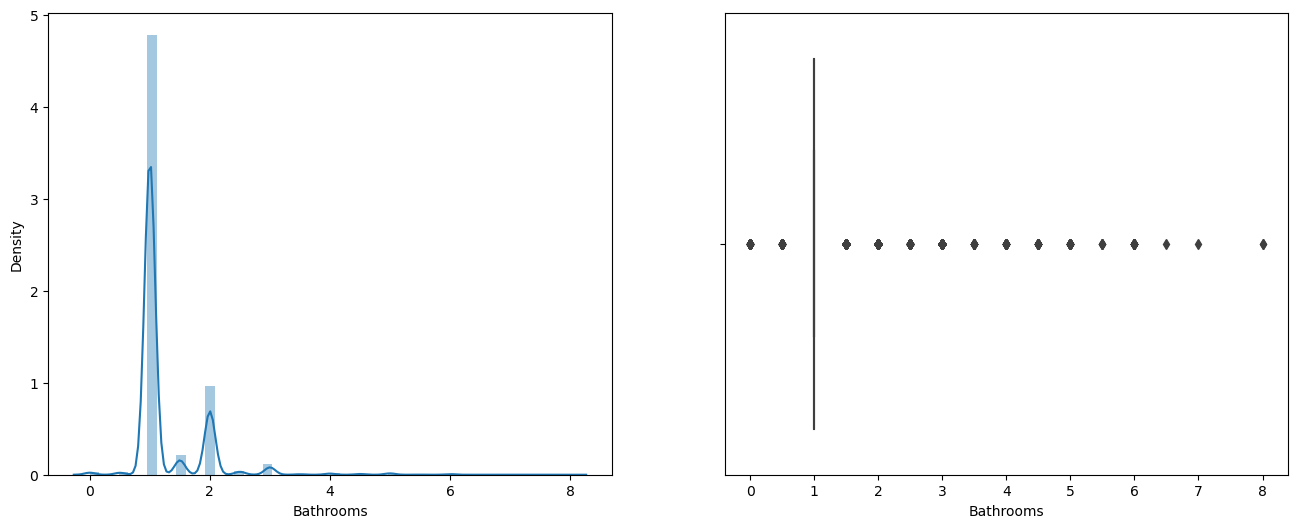

c:\Users\agela\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\agela\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


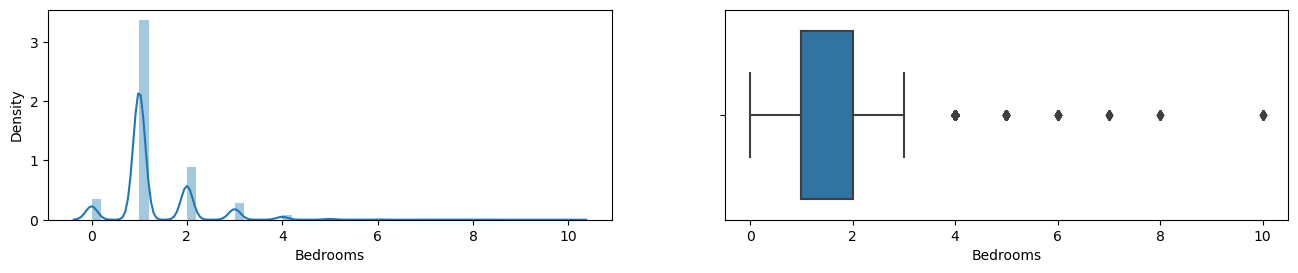

c:\Users\agela\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\agela\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


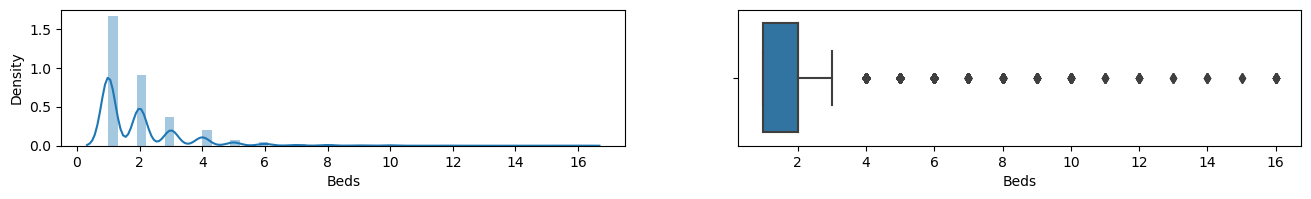

c:\Users\agela\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\agela\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


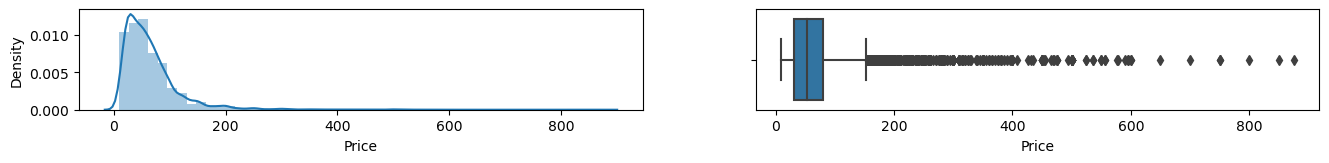

c:\Users\agela\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\agela\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


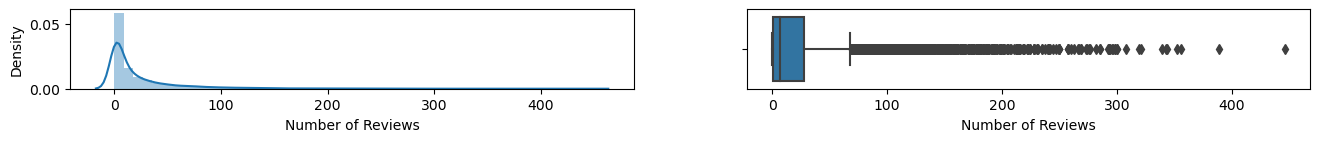

In [ ]:
numeric_col = ['Bathrooms','Bedrooms','Beds', 'Price', 'Number of Reviews']

c = 1
for col in numeric_col:
    plt.figure(figsize=(16,6))
    plt.subplot(c,2,1)
    sns.distplot(df[col])
    plt.subplot(c,2,2)
    sns.boxplot(df[col])
    plt.show()
    c += 1




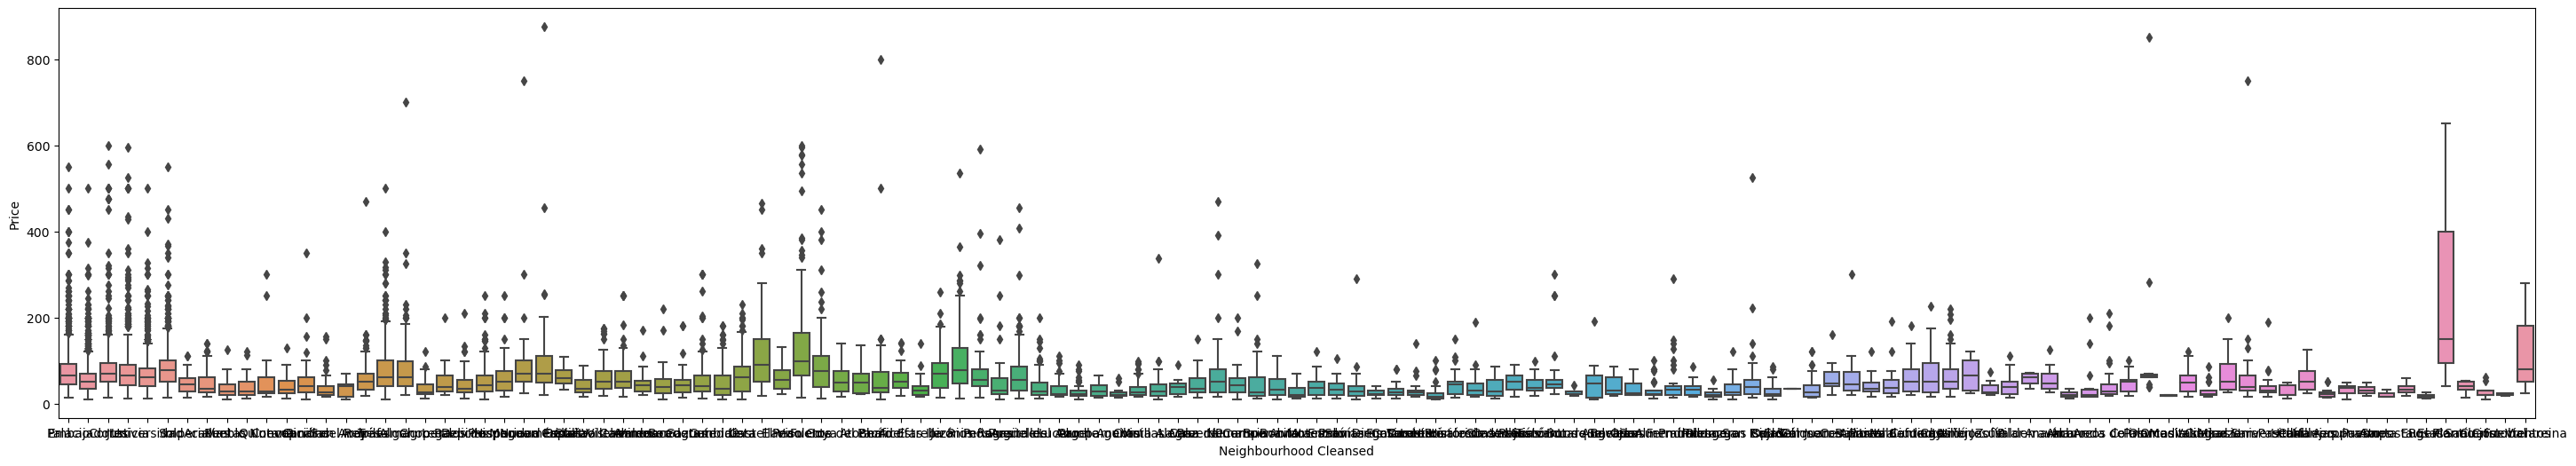

In [ ]:
plt.figure(figsize=(36,6))
sns.boxplot(x = df['Neighbourhood Cleansed'], y = df['Price'])
plt.show()

In [ ]:
df.groupby('Neighbourhood Cleansed')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Neighbourhood Cleansed,,,,,,,,
Abrantes,15.0,28.466667,18.596723,12.0,15.00,20.0,44.00,70.0
Acacias,128.0,43.375000,23.771219,15.0,25.00,35.0,60.00,122.0
Adelfas,43.0,54.046512,25.787551,18.0,37.00,50.0,71.00,140.0
Aeropuerto,6.0,32.166667,14.524692,9.0,24.75,37.0,39.50,49.0
Aguilas,13.0,22.000000,9.556847,14.0,16.00,20.0,24.00,50.0
...,...,...,...,...,...,...,...,...
Valverde,40.0,43.150000,27.551863,14.0,25.00,32.5,54.25,150.0
Ventas,68.0,31.544118,18.339610,10.0,19.00,25.0,40.00,125.0
Vinateros,14.0,25.357143,12.137717,15.0,20.00,23.5,25.00,65.0


In [ ]:
df = df.dropna()

print("Old Shape: ", df.shape)
numeric_col = ['Bedrooms','Beds', 'Number of Reviews', 'Price']

for column in numeric_col:
    for x in [column]:
        q75,q25 = np.percentile(df.loc[:,x],[75,25])
        intr_qr = q75-q25
    
        max = q75+(1.7*intr_qr)
        min = q25-(1.7*intr_qr)
    
        df.loc[df[x] < min,x] = np.nan
        df.loc[df[x] > max,x] = np.nan
    df = df.dropna()


print("New Shape: ", df.shape)


Old Shape:  (13112, 21)
New Shape:  (10264, 21)


c:\Users\agela\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

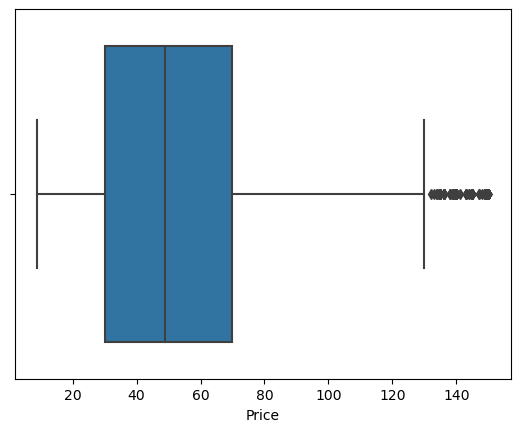

In [ ]:
sns.boxplot(df['Price'])

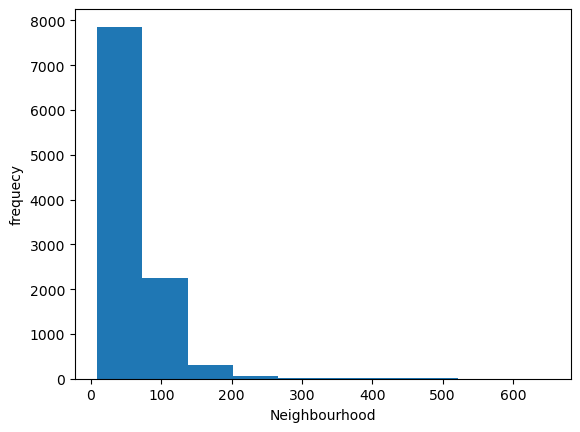

In [ ]:
# ax = df['Price'].plot.hist()
# ax.set_ylabel("frequecy")
# ax.set_xlabel("Neighbourhood")
# plt.show()

In [230]:
plt.scatter(df['Neighbourhood_Cleansed'], df['Neighbourhood Group Cleansed'])
plt.xlabel('Neighbourhood_Cleansed')
plt.grid()
plt.tight_layout()

KeyError: 'Neighbourhood_Cleansed'

In [202]:
corr_matrix = df.corr()
print(corr_matrix)

                         ID   Host ID  Latitude  Longitude  Bathrooms  \
ID                 1.000000  0.614977  0.005033   0.015724  -0.018058   
Host ID            0.614977  1.000000 -0.015402   0.026189  -0.024873   
Latitude           0.005033 -0.015402  1.000000   0.258127   0.043424   
Longitude          0.015724  0.026189  0.258127   1.000000   0.010552   
Bathrooms         -0.018058 -0.024873  0.043424   0.010552   1.000000   
Bedrooms          -0.013134 -0.035130  0.029117   0.012661   0.425418   
Beds              -0.058868 -0.044006  0.015235  -0.023273   0.384928   
Price             -0.029744 -0.071138  0.065900  -0.026423   0.351145   
Number of Reviews -0.424614 -0.255837 -0.061343  -0.038622  -0.059453   

                   Bedrooms      Beds     Price  Number of Reviews  
ID                -0.013134 -0.058868 -0.029744          -0.424614  
Host ID           -0.035130 -0.044006 -0.071138          -0.255837  
Latitude           0.029117  0.015235  0.065900          -0.06

In [ ]:
#Creamos un nuevo csv con el dataframe limpio
df.to_csv('airbnb_clean.csv', index=False)

## Regresión lineal

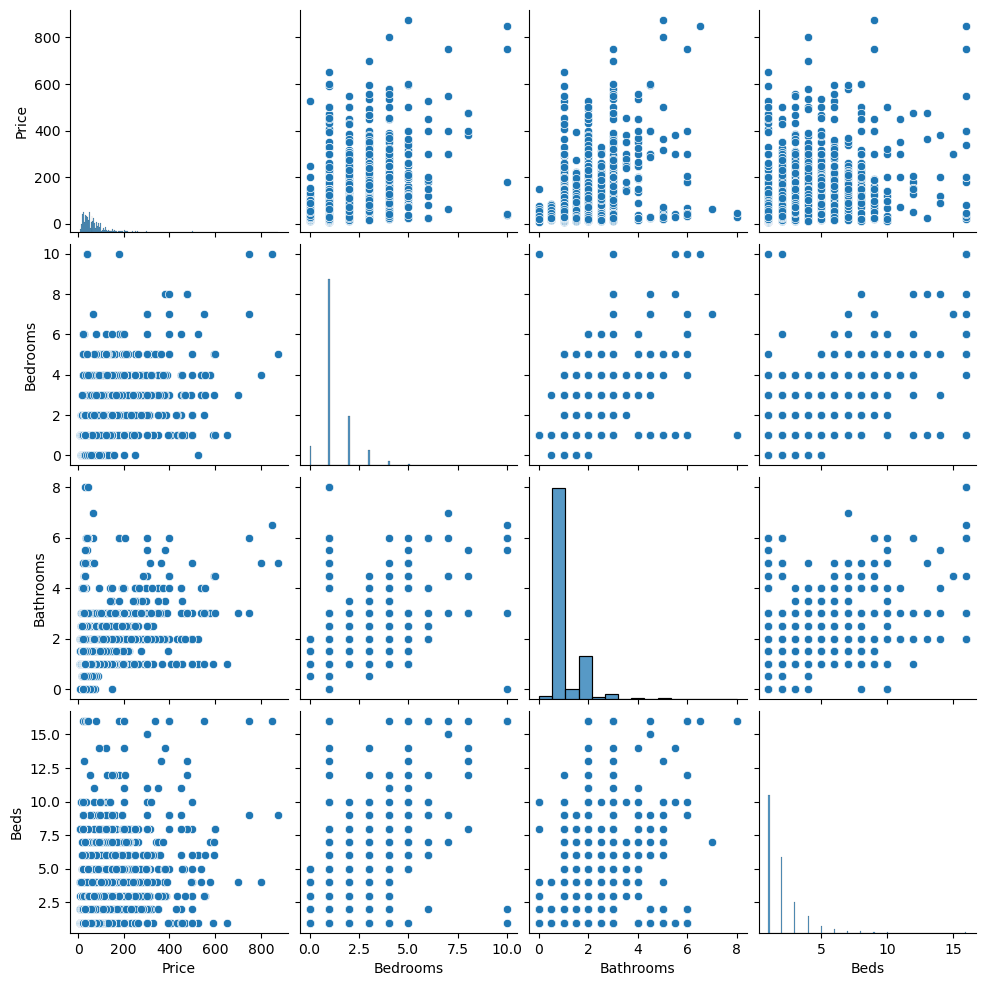

In [205]:
sns.pairplot(df, vars=['Price', 'Bedrooms', 'Bathrooms', 'Beds'])


In [241]:
x_train, x_test, y_train, y_test = train_test_split(
    df[['Bedrooms','Bathrooms', 'Beds']],
    df['Price'],
    test_size=0.2,
    random_state=10
)

In [242]:
multi_regression = LinearRegression()
multi_regression.fit(x_train, y_train)
multi_regression.intercept_

7.366821894599298

In [243]:
multi_coef = pd.DataFrame(data=multi_regression.coef_, index = x_train.columns, columns = ['Coefficient'])
multi_coef

,Coefficient
Bedrooms,21.581741
Bathrooms,11.584529
Beds,8.029604


# Analysing the Estimated Values & Regression residuals 

In [244]:
y_pred_multi = multi_regression.predict(x_test)
residuals = y_pred_multi - y_test


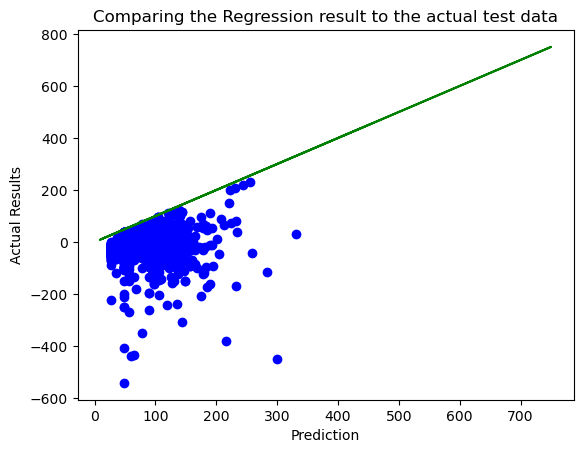

In [245]:
plt.title('Comparing the Regression result to the actual test data')

plt.scatter(y_pred_multi, residuals, color ='b')
plt.plot( y_test, y_test, color ='g')

plt.ylabel('Actual Results')
plt.xlabel('Prediction')

plt.show()

In [246]:
rsquared = multi_regression.score(x_train, y_train)
print(f'Training data r-squared: {rsquared:.2}')

# Sin beds da r = 0.29 se decide añadir el numero de camas

Training data r-squared: 0.31


In [247]:
example = pd.DataFrame.from_dict({'Bedrooms':[4],'Bathrooms':[1],'Beds':[4]})
prediction = multi_regression.predict(example)[0]
print(f"According to the model, a home with 3 bedrooms, 3 beds and 1 bathroom would cost {prediction:.2f}/night")

According to the model, a home with 3 bedrooms, 3 beds and 1 bathroom would cost 137.40/night
